In [ ]:
from IPython.display import clear_output
!pip install tensorflow==2.7.0
clear_output()

In [ ]:
!pip install tensorflow-quantum==0.7.2
clear_output()

In [ ]:
!pip install cirq --pre
clear_output()

In [ ]:
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
import sympy
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.datasets import fashion_mnist as dataset 

In [ ]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()

In [ ]:
print("the shape of the x_train is {}".format(x_train.shape))
print("the shape of the y_train is {}".format(y_train.shape))
print("the shape of the x_test is {}".format(x_test.shape))
print("the shape of the y_test is {}".format(y_test.shape))

the shape of the x_train is (60000, 28, 28)
the shape of the y_train is (60000,)
the shape of the x_test is (10000, 28, 28)
the shape of the y_test is (10000,)


In [ ]:
li = [3,2,3,4]
for i in li:
  print((i==3)|(i==2))

True
True
True
False


In [ ]:
def filter_data(x,y):
  keep = (y==5) | (y==9)
  x,y = x[keep], y[keep] 
  y = y == 5
  return x,y

In [ ]:
x_train, y_train = filter_data(x_train, y_train)
x_test, y_test = filter_data(x_test, y_test)

In [ ]:
print ("the shape pf the x_train is {}".format(x_train.shape))
print ("the shape pf the y_train is {}".format(y_train.shape))
print ("the shape pf the x_test is {}".format(x_test.shape))
print ("the shape pf the y_test is {}".format(y_test.shape))


the shape pf the x_train is (12000, 28, 28)
the shape pf the y_train is (12000,)
the shape pf the x_test is (2000, 28, 28)
the shape pf the y_test is (2000,)


The first image has the label False


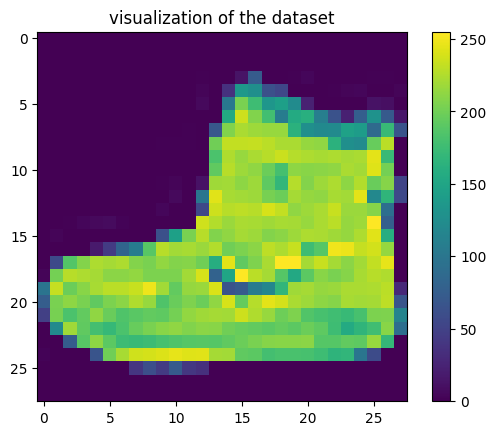

In [ ]:
print("The first image has the label {}".format(y_train[0]))
plt.imshow(x_train[0])
plt.colorbar()
plt.title('visualization of the dataset')
plt.show()

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

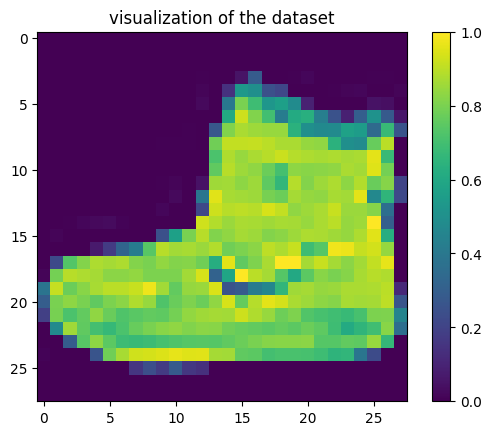

In [ ]:
plt.imshow(x_train[0])
plt.colorbar()
plt.title("visualization of the dataset")
plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0],*(28,28,1))
x_test = x_test.reshape(x_test.shape[0],*(28,28,1))

In [ ]:
x_train = tf.image.resize(x_train,(2,2)).numpy()
x_test = tf.image.resize(x_test,(2,2)).numpy()

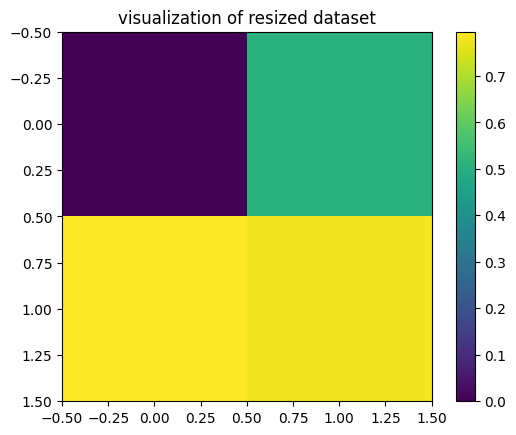

In [ ]:
plt.imshow(x_train[0,:,:,0])
plt.colorbar()
plt.title('visualization of resized dataset')
plt.show()

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train, test_size = 0.15, random_state=0)

In [ ]:
print ("the shape pf the x_train is {}".format(x_train.shape))
print ("the shape pf the y_train is {}".format(y_train.shape))
print ("the shape pf the x_test is {}".format(x_test.shape))
print ("the shape pf the y_test is {}".format(y_test.shape))

the shape pf the x_train is (10200, 2, 2, 1)
the shape pf the y_train is (10200,)
the shape pf the x_test is (2000, 2, 2, 1)
the shape pf the y_test is (2000,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0],* (1,4,1))
x_valid = x_valid.reshape(x_valid.shape[0],* (1,4,1))
x_test = x_test.reshape(x_test.shape[0],* (1,4,1))

In [ ]:
print(x_train[0])

[[[0.        ]
  [0.41568628]
  [0.7137255 ]
  [0.73921573]]]


In [ ]:
def binary_encode(x,threshold=0.5):

  encoded_images = list()
  for image in x:
    encoded_image=[1 if j>threshold else 0 for j in image[0]]
    encoded_images.append(encoded_image)
  return np.array(encoded_images)


In [ ]:
x_train = binary_encode(x_train)

In [ ]:
print(x_train[0])

[0 0 1 1]


In [ ]:
print ("the shape pf the x_train is {}".format(x_train.shape)) 

the shape pf the x_train is (10200, 4)


In [ ]:
import cirq

In [ ]:
qubit = cirq.NamedQubit("Mini Projet")

In [ ]:
circuit = cirq.Circuit(cirq.X(qubit))

In [ ]:
circuit

Mini Projet: ───X───

In [ ]:
def create_circuit_from_image(encoded_image):
  qubits = cirq.GridQubit.rect(2,2)
  circuit = cirq.Circuit()
  for i, pixel in enumerate(encoded_image):
    if pixel:
      circuit.append(cirq.X(qubits[i]))
    return circuit 

In [ ]:
x_train = [create_circuit_from_image(encoded_image) for encoded_image in x_train]

In [ ]:
print(x_train[0])

In [ ]:
x_train_tfq = tfq.convert_to_tensor(x_train)

In [ ]:
x_train_tfq[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'\n\x0e\n\x0ctfq_gate_set\x12\x02\x08\x01'>

In [ ]:
x_valid = binary_encode(x_valid)
x_test = binary_encode(x_test)

In [ ]:
x_valid = [create_circuit_from_image(encoded_image) for encoded_image in x_valid]
x_test = [create_circuit_from_image(encoded_image) for encoded_image in x_test]

In [ ]:
x_valid_tfq = tfq.convert_to_tensor(x_valid)
x_test_tfq = tfq.convert_to_tensor(x_test)

In [ ]:
class QNN():
    def __init__(self, data_qubits, readout):
      self.data_qubits = data_qubits
      self.readout = readout

    def add_singleQubit_gate(self,circuit, gate, qubit_index):

      for index in qubit_index:
        circuit.append(gate(self.data_qubits[index]))

    def add_twoQubit_gate(self,circuit, gate, qubit_index):

      if len(qubit_index)!=2:
        raise Exception("The length of the list of indices passed for two qubit \
        gate operations must be equal to two")
      circuit.append(gate(self.data_qubits[qubit_index[0]], self.data_qubits[qubit_index[1]]))

    def add_layer(self, circuit, gate, symbol_gate):

      for i, qubit in enumerate(self.data_qubits):
        symbol = sympy.Symbol(symbol_gate+ '-' + str(i))
        circuit.append(gate(qubit, self.readout)**symbol)


In [ ]:
def create_qnn():
    data_qubits = cirq.GridQubit.rect(2,2)  
    readout = cirq.GridQubit(-1, -1)        
    circuit = cirq.Circuit()

    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))

    qnn = QNN(
        data_qubits = data_qubits,
        readout=readout)

    qnn.add_layer(circuit, cirq.XX, "xx")
    qnn.add_layer(circuit, cirq.ZZ, "zz")

    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

In [ ]:
qmodel, model_readout = create_qnn()

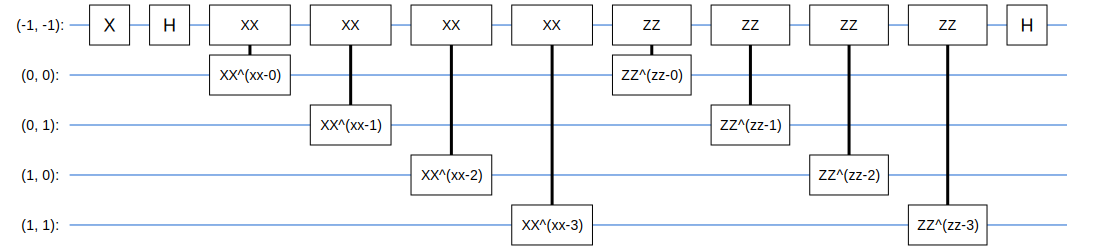

In [ ]:
SVGCircuit(qmodel)

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype=tf.string),
    tfq.layers.PQC(qmodel, model_readout),
])

In [ ]:
y_train_h = np.array([1 if i==1 else -1 for i in y_train ])
y_valid_h = np.array([1 if i==1 else -1 for i in y_valid ])
y_test_h = np.array([1 if i==1 else -1 for i in y_test ])

In [ ]:
print(y_train_h[0])

1


In [ ]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

In [ ]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[hinge_accuracy])

In [ ]:
qnn_history = model.fit(
      x_train_tfq, y_train_h,
      batch_size=64,
      epochs=10,
      verbose=1,
      validation_data=(x_valid_tfq, y_valid_h))

Epoch 1/10
160/160 [==============================] - 10s 58ms/step - loss: 1.0014 - hinge_accuracy: 0.4991 - val_loss: 0.9940 - val_hinge_accuracy: 0.5005
Epoch 2/10
160/160 [==============================] - 10s 59ms/step - loss: 1.0013 - hinge_accuracy: 0.4997 - val_loss: 0.9942 - val_hinge_accuracy: 0.5005
Epoch 3/10
160/160 [==============================] - 7s 41ms/step - loss: 1.0013 - hinge_accuracy: 0.4994 - val_loss: 0.9941 - val_hinge_accuracy: 0.5005
Epoch 4/10
160/160 [==============================] - 6s 37ms/step - loss: 1.0013 - hinge_accuracy: 0.4986 - val_loss: 0.9942 - val_hinge_accuracy: 0.5005
Epoch 5/10
160/160 [==============================] - 11s 66ms/step - loss: 1.0012 - hinge_accuracy: 0.4991 - val_loss: 0.9943 - val_hinge_accuracy: 0.5005
Epoch 6/10
160/160 [==============================] - 5s 32ms/step - loss: 1.0012 - hinge_accuracy: 0.5004 - val_loss: 0.9946 - val_hinge_accuracy: 0.5005
Epoch 7/10
160/160 [==============================] - 6s 40ms/step 

In [ ]:
model.evaluate(x_test_tfq, y_test_h)

63/63 [==============================] - 1s 10ms/step - loss: 1.0001 - hinge_accuracy: 0.5000


[1.0000540018081665, 0.5]

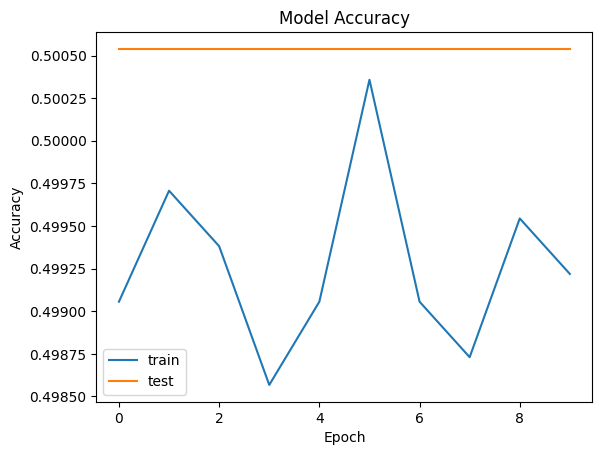

In [ ]:
plt.plot(qnn_history.history['hinge_accuracy'])
plt.plot(qnn_history.history['val_hinge_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc="best")
plt.show()

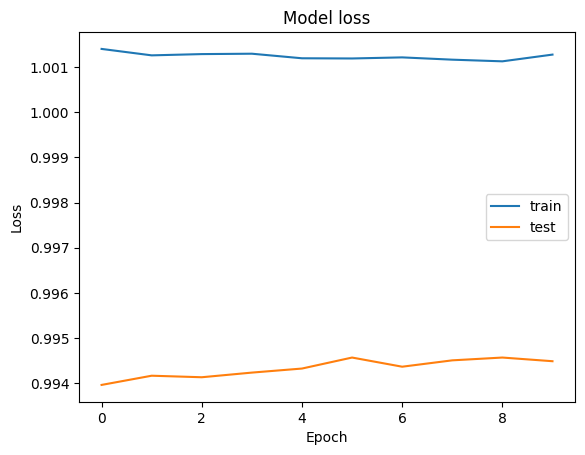

In [ ]:
plt.plot(qnn_history.history['loss'])
plt.plot(qnn_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc="best")
plt.show()

In [ ]:
 model.save_weights('/content/sample_data/Qmodelweights')